In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import date
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.layers.core import Activation
from keras.layers import Bidirectional

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecate

In [2]:
def parser(x):
    # return datetime
    return datetime.strptime(x, '%m/%d/%Y')

# read the csv file
dataset = pd.read_csv("Brent_Daily.csv", parse_dates=['Day'], date_parser=parser)
dataset.head(10)

dataset = dataset.sort_values('Day')
dataset = dataset.groupby('Day')['Europe Brent Spot Price FOB  Dollars per Barrel'].sum().reset_index()
dataset.set_index('Day', inplace=True)
dataset.head()

,Europe Brent Spot Price FOB Dollars per Barrel
Day,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


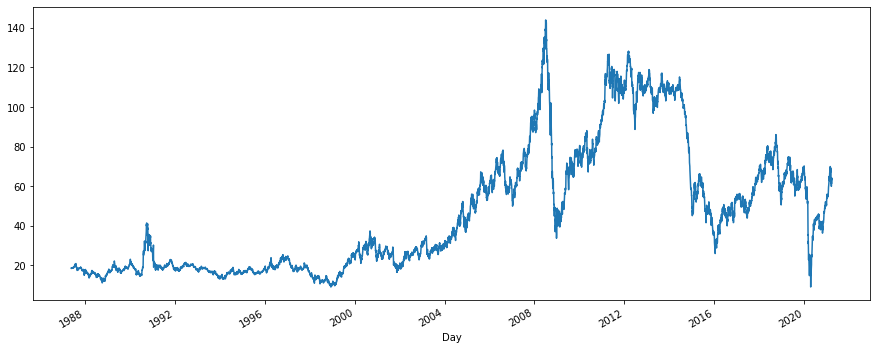

In [3]:
y = dataset['Europe Brent Spot Price FOB  Dollars per Barrel']
y.plot(figsize=(15, 6))
plt.show()

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))
df = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(df) * 0.75)
train, test = df[0:train_size, :], df[train_size:len(df), :]
valid_size = int(len(train) * 0.7)
train1, valid = train[0:valid_size, :], train[valid_size:len(train), :]

In [6]:
def create_data_set(dataset, n_steps = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - n_steps - 1):
        a = dataset[i:(i + n_steps), 0]
        data_x.append(a)
        data_y.append(dataset[i + n_steps, 0])
    return np.array(data_x), np.array(data_y)

In [7]:
n_steps = 2
n_features = 1
X_train,Y_train,X_test,Y_test,X_valid,Y_valid  = [],[],[],[],[],[]

X_train,Y_train=create_data_set(train1,n_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

X_test,Y_test=create_data_set(test,n_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

X_valid,Y_valid=create_data_set(valid,n_steps)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], n_features))

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences = False, input_shape = (n_steps, n_features)))
# model.add(LSTM(50, return_sequences = True, input_shape = (n_steps, n_features)))
# model.add(LSTM(50, return_sequences = True))
# model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

call_back = EarlyStopping(monitor = 'val_loss', patience = 85, mode = 'min')
history = model.fit(X_train, Y_train, epochs = 500, batch_size = 104, validation_data = (X_valid, Y_valid), callbacks = [call_back], shuffle = False)


Train on 4512 samples, validate on 1932 samples
Epoch 1/500
4512/4512 [==============================] - 0s 90us/step - loss: 0.0018 - val_loss: 0.0888
Epoch 2/500
4512/4512 [==============================] - 0s 22us/step - loss: 0.0020 - val_loss: 0.0713
Epoch 3/500
4512/4512 [==============================] - 0s 23us/step - loss: 0.0015 - val_loss: 0.0481
Epoch 4/500
4512/4512 [==============================] - 0s 22us/step - loss: 0.0010 - val_loss: 0.0269
Epoch 5/500
4512/4512 [==============================] - 0s 22us/step - loss: 6.8192e-04 - val_loss: 0.0118
Epoch 6/500
4512/4512 [==============================] - 0s 22us/step - loss: 4.2277e-04 - val_loss: 0.0036
Epoch 7/500
4512/4512 [==============================] - 0s 22us/step - loss: 2.4108e-04 - val_loss: 7.4677e-04
Epoch 8/500
4512/4512 [==============================] - 0s 22us/step - loss: 1.3632e-04 - val_loss: 2.5978e-04
Epoch 9/500
4512/4512 [==============================] - 0s 22us/step - loss: 7.7197e-05 - val_

4512/4512 [==============================] - 0s 24us/step - loss: 3.6126e-05 - val_loss: 2.5203e-04
Epoch 73/500
4512/4512 [==============================] - 0s 24us/step - loss: 3.1885e-05 - val_loss: 2.6744e-04
Epoch 74/500
4512/4512 [==============================] - 0s 31us/step - loss: 3.4946e-05 - val_loss: 2.9192e-04
Epoch 75/500
4512/4512 [==============================] - 0s 24us/step - loss: 3.2960e-05 - val_loss: 2.2958e-04
Epoch 76/500
4512/4512 [==============================] - 0s 22us/step - loss: 4.2883e-05 - val_loss: 2.3922e-04
Epoch 77/500
4512/4512 [==============================] - 0s 21us/step - loss: 3.8621e-05 - val_loss: 2.3463e-04
Epoch 78/500
4512/4512 [==============================] - 0s 22us/step - loss: 4.5439e-05 - val_loss: 2.1713e-04
Epoch 79/500
4512/4512 [==============================] - 0s 23us/step - loss: 3.2166e-05 - val_loss: 2.4003e-04
Epoch 80/500
4512/4512 [==============================] - 0s 22us/step - loss: 3.6952e-05 - val_loss: 2.2934e

4512/4512 [==============================] - 0s 22us/step - loss: 2.6875e-05 - val_loss: 2.3123e-04
Epoch 145/500
4512/4512 [==============================] - 0s 24us/step - loss: 2.8904e-05 - val_loss: 3.7189e-04
Epoch 146/500
4512/4512 [==============================] - 0s 23us/step - loss: 3.5435e-05 - val_loss: 2.8012e-04
Epoch 147/500
4512/4512 [==============================] - 0s 22us/step - loss: 2.7441e-05 - val_loss: 2.3024e-04
Epoch 148/500
4512/4512 [==============================] - 0s 29us/step - loss: 2.9677e-05 - val_loss: 3.5465e-04
Epoch 149/500
4512/4512 [==============================] - 0s 30us/step - loss: 3.9033e-05 - val_loss: 4.8527e-04
Epoch 150/500
4512/4512 [==============================] - 0s 22us/step - loss: 4.0862e-05 - val_loss: 3.0989e-04
Epoch 151/500
4512/4512 [==============================] - 0s 23us/step - loss: 3.1151e-05 - val_loss: 2.7973e-04
Epoch 152/500
4512/4512 [==============================] - 0s 26us/step - loss: 2.9925e-05 - val_loss:

Epoch 216/500
4512/4512 [==============================] - 0s 28us/step - loss: 2.8803e-05 - val_loss: 1.7207e-04
Epoch 217/500
4512/4512 [==============================] - 0s 26us/step - loss: 2.7345e-05 - val_loss: 1.7594e-04
Epoch 218/500
4512/4512 [==============================] - 0s 29us/step - loss: 2.6417e-05 - val_loss: 1.6319e-04
Epoch 219/500
4512/4512 [==============================] - 0s 31us/step - loss: 2.5412e-05 - val_loss: 1.8281e-04
Epoch 220/500
4512/4512 [==============================] - 0s 25us/step - loss: 2.3876e-05 - val_loss: 1.8180e-04
Epoch 221/500
4512/4512 [==============================] - 0s 25us/step - loss: 2.1730e-05 - val_loss: 1.7817e-04
Epoch 222/500
4512/4512 [==============================] - 0s 23us/step - loss: 2.1706e-05 - val_loss: 1.7954e-04
Epoch 223/500
4512/4512 [==============================] - 0s 22us/step - loss: 2.9176e-05 - val_loss: 1.9011e-04
Epoch 224/500
4512/4512 [==============================] - 0s 22us/step - loss: 4.5166e-

Epoch 288/500
4512/4512 [==============================] - 0s 23us/step - loss: 1.2883e-04 - val_loss: 1.9497e-04
Epoch 289/500
4512/4512 [==============================] - 0s 23us/step - loss: 4.7063e-05 - val_loss: 3.2308e-04
Epoch 290/500
4512/4512 [==============================] - 0s 26us/step - loss: 2.4170e-05 - val_loss: 2.2931e-04
Epoch 291/500
4512/4512 [==============================] - 0s 23us/step - loss: 2.1573e-05 - val_loss: 2.6386e-04
Epoch 292/500
4512/4512 [==============================] - 0s 22us/step - loss: 2.2129e-05 - val_loss: 2.9620e-04
Epoch 293/500
4512/4512 [==============================] - 0s 22us/step - loss: 2.1960e-05 - val_loss: 2.4494e-04
Epoch 294/500
4512/4512 [==============================] - 0s 22us/step - loss: 2.0944e-05 - val_loss: 2.6674e-04
Epoch 295/500
4512/4512 [==============================] - 0s 22us/step - loss: 2.0756e-05 - val_loss: 2.5197e-04
Epoch 296/500
4512/4512 [==============================] - 0s 26us/step - loss: 2.1295e-

Epoch 360/500
4512/4512 [==============================] - 0s 26us/step - loss: 2.4823e-05 - val_loss: 1.5946e-04
Epoch 361/500
4512/4512 [==============================] - 0s 26us/step - loss: 2.5344e-05 - val_loss: 1.5976e-04
Epoch 362/500
4512/4512 [==============================] - 0s 24us/step - loss: 2.7139e-05 - val_loss: 1.6052e-04
Epoch 363/500
4512/4512 [==============================] - 0s 23us/step - loss: 2.6685e-05 - val_loss: 1.6832e-04
Epoch 364/500
4512/4512 [==============================] - 0s 23us/step - loss: 2.4734e-05 - val_loss: 1.9697e-04
Epoch 365/500
4512/4512 [==============================] - 0s 25us/step - loss: 2.5359e-05 - val_loss: 1.7294e-04
Epoch 366/500
4512/4512 [==============================] - 0s 30us/step - loss: 2.5653e-05 - val_loss: 1.8591e-04
Epoch 367/500
4512/4512 [==============================] - 0s 23us/step - loss: 2.6794e-05 - val_loss: 1.9553e-04
Epoch 368/500
4512/4512 [==============================] - 0s 24us/step - loss: 2.7305e-

In [9]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

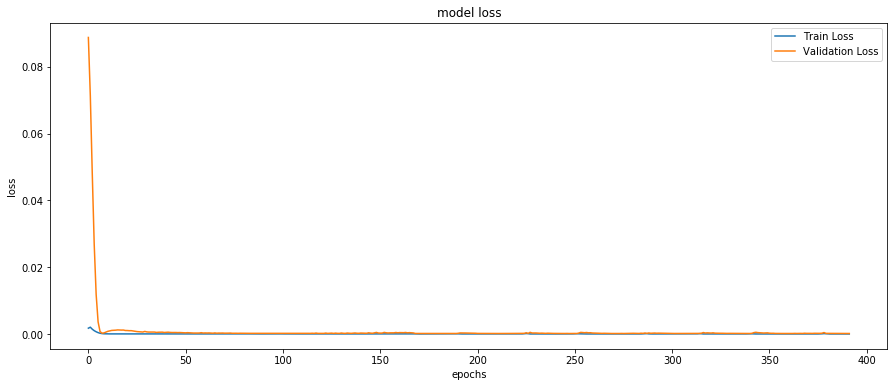

In [10]:
plt.figure(figsize = (15,6))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')
plt.show();

In [11]:
# # invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [12]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error: 0.40354209836493143
Test Mean Absolute Error: 0.9565975932435614


In [13]:
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Root Mean Squared Error: 0.5950891210546968
Test Root Mean Squared Error: 1.30610583420972


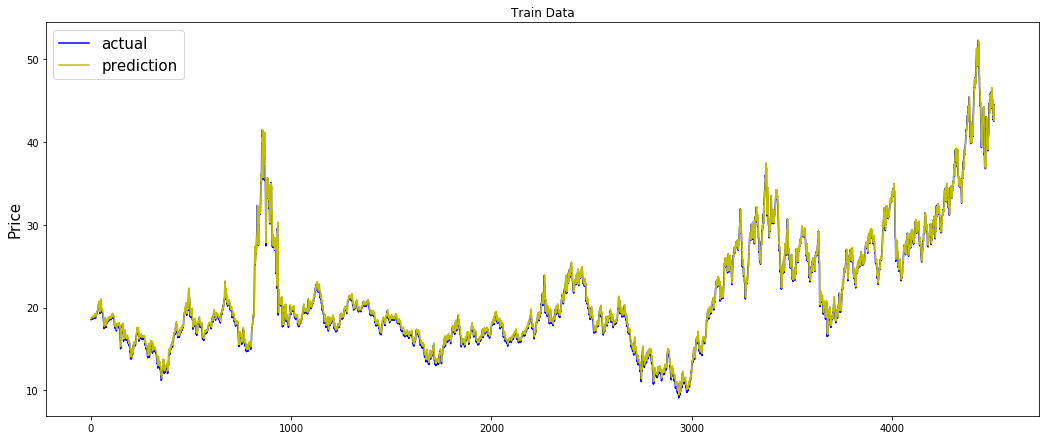

In [14]:
# Compare train data Actual vs. Prediction
plt.style.context("seaborn-white")
plt.figure(figsize=(15,6))
plt.plot(Y_train[0], 'b', label="actual")
plt.plot(train_predict, 'y', label="prediction")
plt.tight_layout()
plt.title('Train Data')
# sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.legend(fontsize=15)
plt.show();

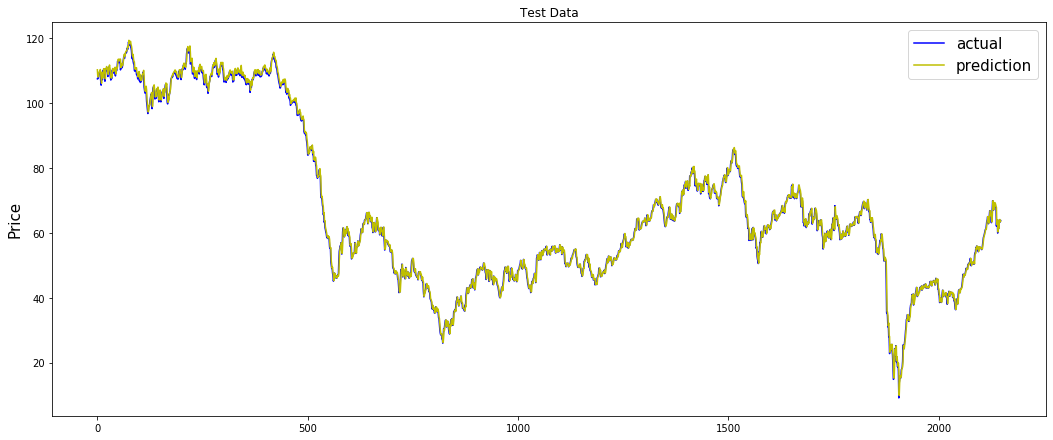

In [15]:
# Compare test data Actual vs. Prediction
plt.figure(figsize=(15,6))
plt.plot(Y_test[0], 'b', label="actual")
plt.plot(test_predict, 'y', label="prediction")
plt.tight_layout()
plt.title('Test Data')
# sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.legend(fontsize=15)
plt.show();